In [1]:
import pandas as pd
import os
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

from utils import split_timestamp, add_time_aggs, read_file_and_clean

In [2]:
sns.set_style('white')
plt.xkcd()

In [3]:
feeds = read_file_and_clean("nursed")

In [4]:
feeds["total_duration"] = feeds[["left_duration", "right_duration"]].sum(axis=1) / 60

<AxesSubplot:title={'center':'Average daily time feeding'}, xlabel='month', ylabel='Daily feed (hours)'>

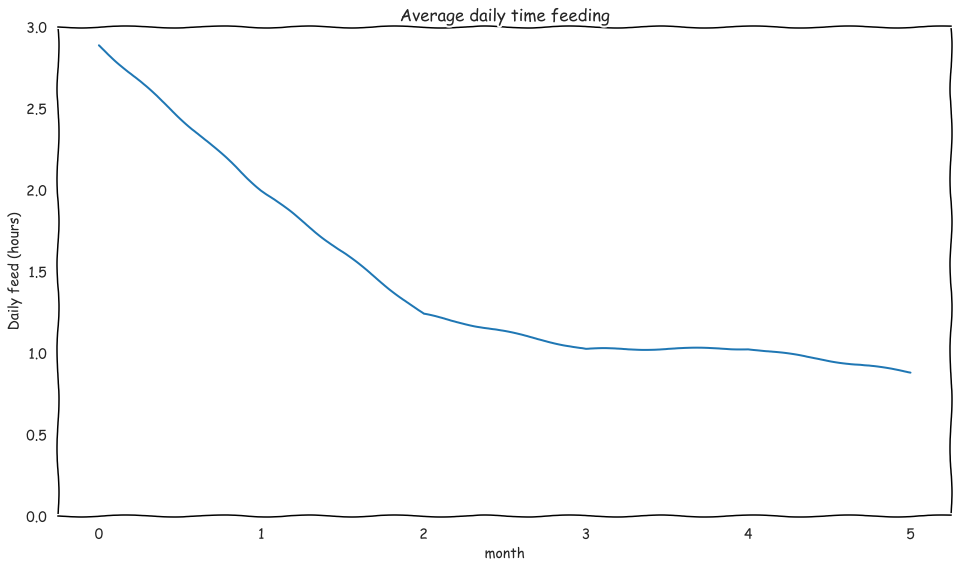

In [5]:
(
    feeds
    .groupby("start_date")
    .agg({"month": "max","total_duration": "sum"})
    .groupby("month")
    .mean()["total_duration"]
    .plot(
        ylim=(0,3),
        figsize=(16,9),
        title="Average daily time feeding",
        ylabel="Daily feed (hours)"
    )
)

## Total feeds

<AxesSubplot:title={'center':'Total feeds per week'}, xlabel='week', ylabel='# feeds per week'>

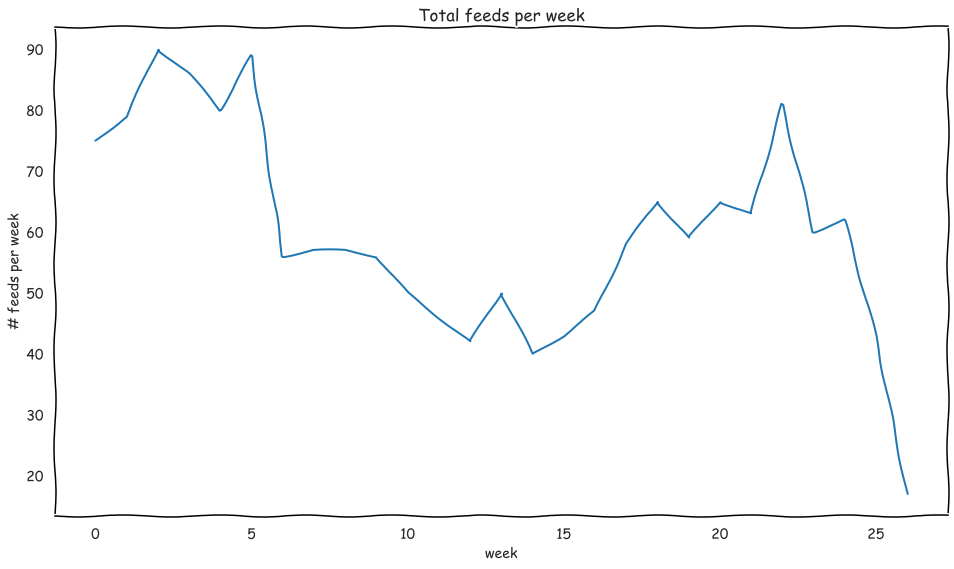

In [12]:
feeds.groupby("week").size().plot(
#         ylim=(0,3),
        figsize=(16,9),
        title="Total feeds per week",
        ylabel="# feeds per week"
)

<AxesSubplot:title={'center':'Total feeds per week'}, xlabel='week', ylabel='# feeds per week'>

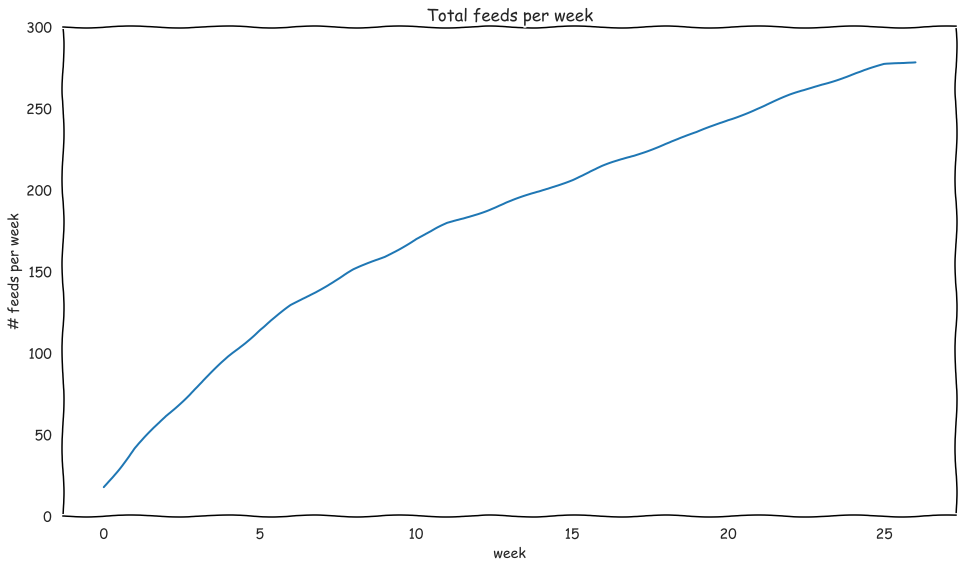

In [17]:
feeds.groupby("week").sum()["total_duration"].cumsum().plot(
        ylim=(0,300),
        figsize=(16,9),
        title="Total feeds per week",
        ylabel="# feeds per week"
)